## Фильтрация сигнала фильтром Баттерворта
Подробнее: https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.butter.html

In [5]:
%matplotlib inline

# импорты
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack
from scipy import signal

In [15]:
# данные
## Число семплов
N = 600
## период сэмплов
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N)
y = 2*np.sin(10.0 * 2.0*np.pi*x) + np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)

In [16]:
# преобразование
yf = scipy.fftpack.fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N/2)

d:\program files (x86)\python37-32\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  This is separate from the ipykernel package so we can avoid doing imports until


In [95]:
# Создание фильтра
b, a = signal.butter(4, [100], 'low', analog=True)
w, h = signal.freqs(b, a)

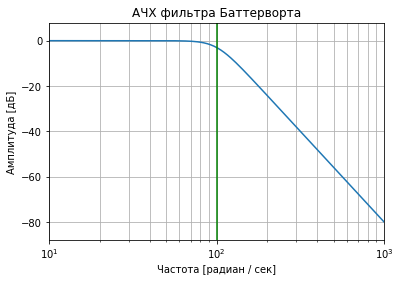

In [96]:
# Ачх фильтра
plt.semilogx(w, 20 * np.log10(abs(h)))
plt.title('АЧХ фильтра Баттерворта')
plt.xlabel('Частота [радиан / сек]')
plt.ylabel('Амплитуда [дБ]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(100, color='green') # частота среза
plt.show()

In [113]:
# фильтрация
sos = signal.butter(4, [100], 'lp', fs=100000, output='sos')
filtered = signal.sosfilt(sos, yf)

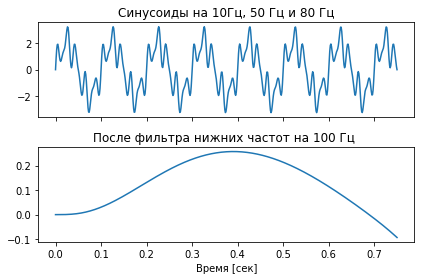

In [114]:
# Результаты
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(x, y)
ax1.set_title('Синусоиды на 10Гц, 50 Гц и 80 Гц')
# ax1.axis([0, 1, -2, 2])
ax2.plot(x, filtered)
ax2.set_title('После фильтра нижних частот на 100 Гц ')
# ax2.axis([0, 1, -2, 2])
ax2.set_xlabel('Время [сек]')
plt.tight_layout()
plt.show()

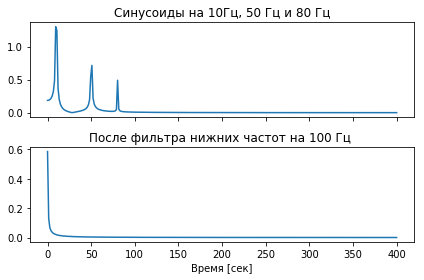

In [115]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(xf, 2.0/N * np.abs(scipy.fftpack.fft(y)[:N//2]))
ax1.set_title('Синусоиды на 10Гц, 50 Гц и 80 Гц')
# ax1.axis([0, 1, -2, 2])
ax2.plot(xf, 2.0/N * np.abs(scipy.fftpack.fft(filtered)[:N//2]))
ax2.set_title('После фильтра нижних частот на 100 Гц ')
# ax2.axis([0, 1, -2, 2])
ax2.set_xlabel('Время [сек]')
plt.tight_layout()
plt.show()